## Importing all the necassary libraries

In [57]:
import pandas as pd
import numpy as np
import json
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from collections import Counter

nltk.download('words')  
nltk.download('punkt')  

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Sherow\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sherow\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Data Analysis and Data Cleaning ##

Loading the Dataset from a CSV File

In [58]:
# Load the dataset from a CSV file into the 'df' DataFrame.
df = pd.read_csv(r'c:\YoutubeProject\US_youtube_trending_data.csv')

Displaying Information About the Dataset

In [59]:
# Use df.info() to display details about the DataFrame, including column names and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229588 entries, 0 to 229587
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           229588 non-null  object
 1   title              229588 non-null  object
 2   publishedAt        229588 non-null  object
 3   channelId          229588 non-null  object
 4   channelTitle       229588 non-null  object
 5   categoryId         229588 non-null  int64 
 6   trending_date      229588 non-null  object
 7   tags               229588 non-null  object
 8   view_count         229588 non-null  int64 
 9   likes              229588 non-null  int64 
 10  dislikes           229588 non-null  int64 
 11  comment_count      229588 non-null  int64 
 12  thumbnail_link     229588 non-null  object
 13  comments_disabled  229588 non-null  bool  
 14  ratings_disabled   229588 non-null  bool  
 15  description        225188 non-null  object
dtypes: bool(2), int64(5)

Dropping Unnecessary Columns

In [60]:
# Remove the 'thumbnail_link' column
df.drop('thumbnail_link', axis=1, inplace=True)

# Remove the 'video_id' column
df.drop('video_id', axis=1, inplace=True)

# Remove the 'channelId' column
df.drop('channelId', axis=1, inplace=True)

Loading Video Genres from a JSON File

In [61]:
# Open the JSON file containing category information
with open(r'c:\YoutubeProject\US_category_id.json') as f:
    category_dict = json.load(f)  # Store category names and their numerical IDs

# Replace numerical category IDs with their corresponding category names
df['categoryName'] = df['categoryId'].astype(str).replace(category_dict)

# Drop the 'categoryId' column to retain only the category names
df = df.drop('categoryId', axis=1)

df.head()

,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare...",Gaming
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,False,False,I left youtube for a month and this is what ha...,Entertainment
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,False,False,Transforming The LaBrant Family's empty white ...,Howto & Style


Converting the 'title' column into a list format

In [62]:
# Convert all text in the 'title' column to lowercase
df['title'] = df['title'].str.lower()

# Remove semicolons, question marks, colons, and other unnecessary marks
df['title'] = df['title'].str.replace('[;?!:|-]', '', regex=True)

# Split the text in the 'title' column into lists of words
df['title'] = df['title'].str.split()

Turning tags into a list format

In [63]:
# Defining a function for clean text
def clean_tag(tags):
    return [tag.lower().replace('"', '') for tag in tags.split('|')]

# Applying clean textf function for df
df['tags'] = df['tags'].apply(clean_tag)

Creating a different dataset using only the Sports genre

In [89]:
dfSport = df[df['categoryName'] == 'Sports']
dfPpl=df[df['categoryName'] == 'People & Blogs']
dfGame=df[df['categoryName'] == 'Gaming']
dfSport.head()

,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName
40,"[shannon, reacts, to, kyle, kuzma's, gamewinni...",2020-08-11T16:21:47Z,Skip and Shannon: UNDISPUTED,2020-08-12T00:00:00Z,"[fox, fox sports, fs1, fox sports 1, undispute...",540613,7155,308,1647,False,False,LeBron and the Lakers finally snapped their 3-...,Sports
43,"[giannis, gets, ejected, after, headbutting, m...",2020-08-12T02:30:32Z,Bleacher Report,2020-08-12T00:00:00Z,"[bleacher report, br, nba, giannis, giannis an...",756814,8278,331,2441,False,False,"In a random and wild sequence of events, Giann...",Sports
47,"[trail, blazers, at, mavericks, full, game, hi...",2020-08-12T01:27:17Z,NBA,2020-08-12T00:00:00Z,"[nba, g league, basketball, game-0021901300, j...",937569,10160,405,3119,False,False,TRAIL BLAZERS at MAVERICKS | FULL GAME HIGHLIG...,Sports
65,"['don't, mess, with, dame, dolla', stephen, a....",2020-08-10T15:25:12Z,ESPN,2020-08-12T00:00:00Z,"[first take, damian lillard, paul george, patr...",791489,13242,325,2728,False,False,Stephen A. Smith explains why LA Clippers SF P...,Sports
68,"[nuggets, at, lakers, full, game, highlights, ...",2020-08-11T03:53:08Z,NBA,2020-08-12T00:00:00Z,"[nba, g league, basketball, game-0021901296, j...",2103682,22243,907,3946,False,False,NUGGETS at LAKERS | FULL GAME HIGHLIGHTS | Aug...,Sports


## Exploring the Relationship Between Video Popularity and Tags

**Analysing dfSport dataframe**

Creating a different dataset with the most used words from tags column from the dfSport dataset

In [65]:
# Flatten the list of lists in the 'tags' column into a single list of tags
all_tags = [tag for tags in dfSport['tags'] for tag in tags if tag != '[none]']

# Count the frequency of each tag
tag_frequencies = Counter(all_tags)

# Create a DataFrame to store the tag names and their frequencies
tag_frequencies_df = pd.DataFrame(tag_frequencies.items(), columns=['Tag', 'Frequency'])

# Sort the DataFrame by frequency in descending order
tag_frequencies_df = tag_frequencies_df.sort_values(by='Frequency', ascending=False)

# Reset the index of the DataFrame
tag_frequencies_df = tag_frequencies_df.reset_index(drop=True)
tag_frequencies_df

,Tag,Frequency
0,football,4314
1,nba,4117
2,highlights,3851
3,sports,3541
4,basketball,3023
...,...,...
27822,delphine delrue,1
27823,p_70762,1
27824,thom gicquel,1
27825,p_68544,1


Top 10% Most Used Words with Stop Words Removed

In [66]:
# Calculate the total number of unique tags
total_unique_tags = len(tag_frequencies_df)

# Calculate the top 10% threshold
top_10_percent_threshold = int(total_unique_tags * 0.10)

# Filter the tags to get the top 10% most frequent tags
top_10_percent_tags = tag_frequencies_df.head(top_10_percent_threshold)

# Remove tags with a frequency of 1
top_10_percent_tags = top_10_percent_tags[top_10_percent_tags['Frequency'] != 1]

# Reset the index of the DataFrame
top_10_percent_tags = top_10_percent_tags.reset_index(drop=True)
top_10_percent_tags

,Tag,Frequency
0,football,4314
1,nba,4117
2,highlights,3851
3,sports,3541
4,basketball,3023
...,...,...
2777,women's world cup,27
2778,best boxing knockouts,27
2779,nfl throwback,27
2780,save,27


Identifying the Presence of Top 10% 

In [67]:
# Extract the tags from the 'Tag' column of the top_10_percent_tags DataFrame
top_10_percent_words = top_10_percent_tags['Tag'].tolist()

# Create a set of the top 10% most used words
top_10_percent_words_set = set(top_10_percent_words)

# Function to check if any word from the top 10% is present in the tags list
def contains_top_words(tags):
    for tag in tags:
        if tag in top_10_percent_words_set:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'tags' column of the dfSport DataFrame
dfSport['TagUsage'] = dfSport['tags'].apply(contains_top_words)

C:\Users\Sherow\AppData\Local\Temp\ipykernel_23576\3325300453.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSport['TagUsage'] = dfSport['tags'].apply(contains_top_words)


Identifying the top 3 most used tags

In [68]:
top_3_tags=['football','nba','highlights']

# Function to check if any of the top 3 tags are present in the 'tags' list
def contains_top_tags(tags):
    for tag in tags:
        if tag in top_3_tags:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'tags' column of the dfSport DataFrame
dfSport['TopTagsUsage'] = dfSport['tags'].apply(contains_top_tags)

dfSport

C:\Users\Sherow\AppData\Local\Temp\ipykernel_23576\2763176754.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSport['TopTagsUsage'] = dfSport['tags'].apply(contains_top_tags)


,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName,TagUsage,TopTagsUsage
40,"[shannon, reacts, to, kyle, kuzma's, gamewinni...",2020-08-11T16:21:47Z,Skip and Shannon: UNDISPUTED,2020-08-12T00:00:00Z,"[fox, fox sports, fs1, fox sports 1, undispute...",540613,7155,308,1647,False,False,LeBron and the Lakers finally snapped their 3-...,Sports,Used,Used
43,"[giannis, gets, ejected, after, headbutting, m...",2020-08-12T02:30:32Z,Bleacher Report,2020-08-12T00:00:00Z,"[bleacher report, br, nba, giannis, giannis an...",756814,8278,331,2441,False,False,"In a random and wild sequence of events, Giann...",Sports,Used,Used
47,"[trail, blazers, at, mavericks, full, game, hi...",2020-08-12T01:27:17Z,NBA,2020-08-12T00:00:00Z,"[nba, g league, basketball, game-0021901300, j...",937569,10160,405,3119,False,False,TRAIL BLAZERS at MAVERICKS | FULL GAME HIGHLIG...,Sports,Used,Used
65,"['don't, mess, with, dame, dolla', stephen, a....",2020-08-10T15:25:12Z,ESPN,2020-08-12T00:00:00Z,"[first take, damian lillard, paul george, patr...",791489,13242,325,2728,False,False,Stephen A. Smith explains why LA Clippers SF P...,Sports,Used,Used
68,"[nuggets, at, lakers, full, game, highlights, ...",2020-08-11T03:53:08Z,NBA,2020-08-12T00:00:00Z,"[nba, g league, basketball, game-0021901296, j...",2103682,22243,907,3946,False,False,NUGGETS at LAKERS | FULL GAME HIGHLIGHTS | Aug...,Sports,Used,Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229551,"[charles, barkley, reacts, to, damian, lillard...",2023-09-27T22:03:32Z,Bleacher Report,2023-10-02T00:00:00Z,"[bleacher report, br, nba, charles barkley, in...",799175,8289,0,1716,False,False,Charles Barkley joined NBA TV Gametime to brea...,Sports,Used,Used
229555,"[carabao, cup, holders, begin, defence, manche...",2023-09-26T22:37:21Z,EFL,2023-10-02T00:00:00Z,"[efl, goal, save, championship, league one, le...",2329223,32992,0,1345,False,False,Subscribe to the channel for more of the best ...,Sports,Used,Used
229558,"[this, one, mistake, changed, the, nba, forever]",2023-09-25T23:45:31Z,JxmyHighroller,2023-10-02T00:00:00Z,"[lebron james, house of highlights, espn, nba ...",918167,53695,0,1856,False,False,Thanks to Liquid I.V. for sponsoring today’s v...,Sports,Used,Not Used
229580,"[the, new, new, new, new, new, new, new, new, ...",2023-09-25T04:03:00Z,ThatsGoodSports,2023-10-02T00:00:00Z,"[the new worst game ever, dolphins score 70, b...",1121612,48737,0,8398,False,False,The New Worst Game Ever. Denver Broncos lose t...,Sports,Used,Not Used


In [69]:
noTags=['[none]']

# Function to check if any of the top 3 tags are present in the 'tags' list
def contains_top_tags(tags):
    for tag in tags:
        if tag in noTags:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'tags' column of the dfSport DataFrame
dfSport['NoTags'] = dfSport['tags'].apply(contains_top_tags)

dfSport

C:\Users\Sherow\AppData\Local\Temp\ipykernel_23576\1669122864.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSport['NoTags'] = dfSport['tags'].apply(contains_top_tags)


,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName,TagUsage,TopTagsUsage,NoTags
40,"[shannon, reacts, to, kyle, kuzma's, gamewinni...",2020-08-11T16:21:47Z,Skip and Shannon: UNDISPUTED,2020-08-12T00:00:00Z,"[fox, fox sports, fs1, fox sports 1, undispute...",540613,7155,308,1647,False,False,LeBron and the Lakers finally snapped their 3-...,Sports,Used,Used,Not Used
43,"[giannis, gets, ejected, after, headbutting, m...",2020-08-12T02:30:32Z,Bleacher Report,2020-08-12T00:00:00Z,"[bleacher report, br, nba, giannis, giannis an...",756814,8278,331,2441,False,False,"In a random and wild sequence of events, Giann...",Sports,Used,Used,Not Used
47,"[trail, blazers, at, mavericks, full, game, hi...",2020-08-12T01:27:17Z,NBA,2020-08-12T00:00:00Z,"[nba, g league, basketball, game-0021901300, j...",937569,10160,405,3119,False,False,TRAIL BLAZERS at MAVERICKS | FULL GAME HIGHLIG...,Sports,Used,Used,Not Used
65,"['don't, mess, with, dame, dolla', stephen, a....",2020-08-10T15:25:12Z,ESPN,2020-08-12T00:00:00Z,"[first take, damian lillard, paul george, patr...",791489,13242,325,2728,False,False,Stephen A. Smith explains why LA Clippers SF P...,Sports,Used,Used,Not Used
68,"[nuggets, at, lakers, full, game, highlights, ...",2020-08-11T03:53:08Z,NBA,2020-08-12T00:00:00Z,"[nba, g league, basketball, game-0021901296, j...",2103682,22243,907,3946,False,False,NUGGETS at LAKERS | FULL GAME HIGHLIGHTS | Aug...,Sports,Used,Used,Not Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229551,"[charles, barkley, reacts, to, damian, lillard...",2023-09-27T22:03:32Z,Bleacher Report,2023-10-02T00:00:00Z,"[bleacher report, br, nba, charles barkley, in...",799175,8289,0,1716,False,False,Charles Barkley joined NBA TV Gametime to brea...,Sports,Used,Used,Not Used
229555,"[carabao, cup, holders, begin, defence, manche...",2023-09-26T22:37:21Z,EFL,2023-10-02T00:00:00Z,"[efl, goal, save, championship, league one, le...",2329223,32992,0,1345,False,False,Subscribe to the channel for more of the best ...,Sports,Used,Used,Not Used
229558,"[this, one, mistake, changed, the, nba, forever]",2023-09-25T23:45:31Z,JxmyHighroller,2023-10-02T00:00:00Z,"[lebron james, house of highlights, espn, nba ...",918167,53695,0,1856,False,False,Thanks to Liquid I.V. for sponsoring today’s v...,Sports,Used,Not Used,Not Used
229580,"[the, new, new, new, new, new, new, new, new, ...",2023-09-25T04:03:00Z,ThatsGoodSports,2023-10-02T00:00:00Z,"[the new worst game ever, dolphins score 70, b...",1121612,48737,0,8398,False,False,The New Worst Game Ever. Denver Broncos lose t...,Sports,Used,Not Used,Not Used


In [70]:
# Function to determine the status based on 'tags', 'TagUsage', and 'TopTagsUsage'
def determine_status(row):
    if '[none]' in row['tags']:
        return 'Empty'
    if row['TagUsage'] == 'Used' and row['TopTagsUsage'] == 'Used':
        return 'Top3'
    elif row['TopTagsUsage'] == 'Used':
        return 'Top3'
    elif row['TagUsage'] == 'Used':
        return 'Top10%'
    else:
        return 'Unused'

# Apply the function to create the new column 'Status'
dfSport['Status'] = dfSport.apply(determine_status, axis=1)

dfSport

C:\Users\Sherow\AppData\Local\Temp\ipykernel_23576\1817320186.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSport['Status'] = dfSport.apply(determine_status, axis=1)


,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName,TagUsage,TopTagsUsage,NoTags,Status
40,"[shannon, reacts, to, kyle, kuzma's, gamewinni...",2020-08-11T16:21:47Z,Skip and Shannon: UNDISPUTED,2020-08-12T00:00:00Z,"[fox, fox sports, fs1, fox sports 1, undispute...",540613,7155,308,1647,False,False,LeBron and the Lakers finally snapped their 3-...,Sports,Used,Used,Not Used,Top3
43,"[giannis, gets, ejected, after, headbutting, m...",2020-08-12T02:30:32Z,Bleacher Report,2020-08-12T00:00:00Z,"[bleacher report, br, nba, giannis, giannis an...",756814,8278,331,2441,False,False,"In a random and wild sequence of events, Giann...",Sports,Used,Used,Not Used,Top3
47,"[trail, blazers, at, mavericks, full, game, hi...",2020-08-12T01:27:17Z,NBA,2020-08-12T00:00:00Z,"[nba, g league, basketball, game-0021901300, j...",937569,10160,405,3119,False,False,TRAIL BLAZERS at MAVERICKS | FULL GAME HIGHLIG...,Sports,Used,Used,Not Used,Top3
65,"['don't, mess, with, dame, dolla', stephen, a....",2020-08-10T15:25:12Z,ESPN,2020-08-12T00:00:00Z,"[first take, damian lillard, paul george, patr...",791489,13242,325,2728,False,False,Stephen A. Smith explains why LA Clippers SF P...,Sports,Used,Used,Not Used,Top3
68,"[nuggets, at, lakers, full, game, highlights, ...",2020-08-11T03:53:08Z,NBA,2020-08-12T00:00:00Z,"[nba, g league, basketball, game-0021901296, j...",2103682,22243,907,3946,False,False,NUGGETS at LAKERS | FULL GAME HIGHLIGHTS | Aug...,Sports,Used,Used,Not Used,Top3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229551,"[charles, barkley, reacts, to, damian, lillard...",2023-09-27T22:03:32Z,Bleacher Report,2023-10-02T00:00:00Z,"[bleacher report, br, nba, charles barkley, in...",799175,8289,0,1716,False,False,Charles Barkley joined NBA TV Gametime to brea...,Sports,Used,Used,Not Used,Top3
229555,"[carabao, cup, holders, begin, defence, manche...",2023-09-26T22:37:21Z,EFL,2023-10-02T00:00:00Z,"[efl, goal, save, championship, league one, le...",2329223,32992,0,1345,False,False,Subscribe to the channel for more of the best ...,Sports,Used,Used,Not Used,Top3
229558,"[this, one, mistake, changed, the, nba, forever]",2023-09-25T23:45:31Z,JxmyHighroller,2023-10-02T00:00:00Z,"[lebron james, house of highlights, espn, nba ...",918167,53695,0,1856,False,False,Thanks to Liquid I.V. for sponsoring today’s v...,Sports,Used,Not Used,Not Used,Top10%
229580,"[the, new, new, new, new, new, new, new, new, ...",2023-09-25T04:03:00Z,ThatsGoodSports,2023-10-02T00:00:00Z,"[the new worst game ever, dolphins score 70, b...",1121612,48737,0,8398,False,False,The New Worst Game Ever. Denver Broncos lose t...,Sports,Used,Not Used,Not Used,Top10%


Creating a graph displaying the usage of the top 10% tags

Showing the precentage of 10% most used tags

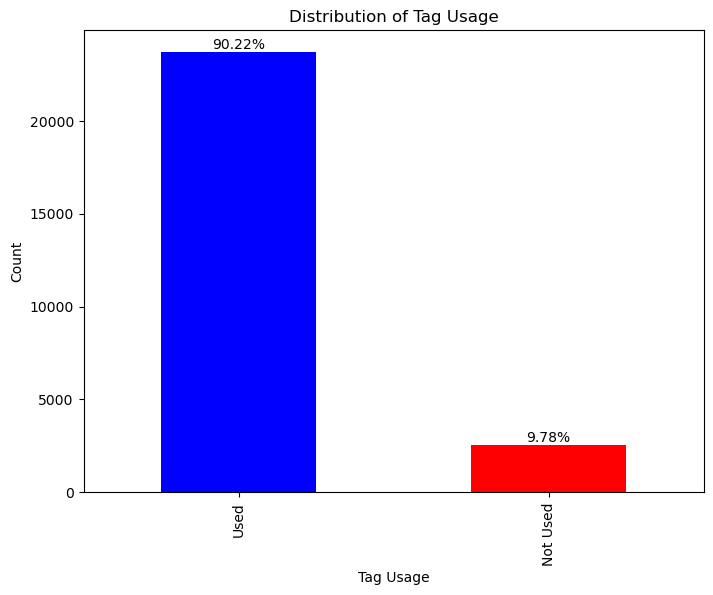

In [72]:
# Count the frequencies of each unique value in the 'TagUsage' column
tag_usage_counts = dfSport['TagUsage'].value_counts()

# Calculate the percentage for each 'TagUsage' category
tag_usage_percentages = tag_usage_counts / tag_usage_counts.sum() * 100

# Define custom colors for each 'TagUsage'
custom_colors = ['blue', 'red']

# Create a bar chart with custom colors and annotations for percentages
plt.figure(figsize=(8, 6))
ax = tag_usage_counts.plot(kind='bar', color=custom_colors)
plt.title('Distribution of Tag Usage')
plt.xlabel('Tag Usage')
plt.ylabel('Count')

# Annotate the bars with percentages
for i, v in enumerate(tag_usage_counts):
    ax.text(i, v, f'{tag_usage_percentages[i]:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()

Creating graph displaying the top 3 most frequent tags' involvement

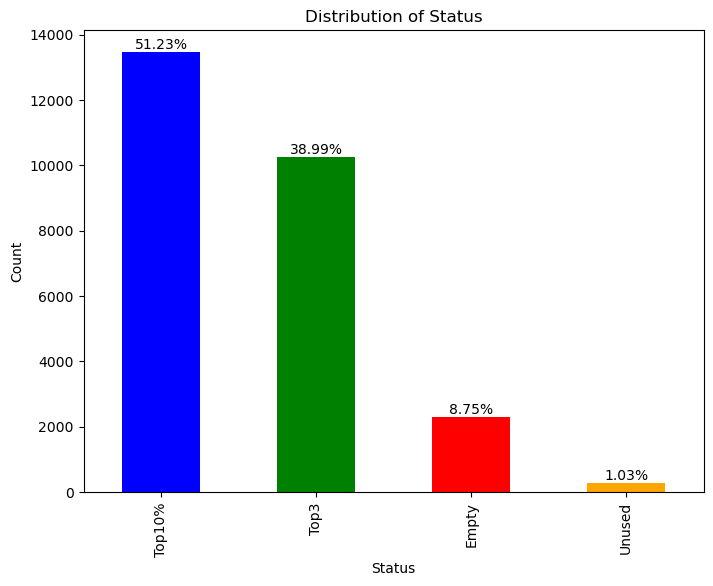

In [74]:
# Count the frequencies of each unique value in the 'Status' column
status_counts = dfSport['Status'].value_counts()

# Calculate the percentage for each status category
status_percentages = status_counts / status_counts.sum() * 100

# Define custom colors for each status
custom_colors = ['blue', 'green', 'red', 'orange']

# Create a bar chart with custom colors and annotations for percentages
plt.figure(figsize=(8, 6))
ax = status_counts.plot(kind='bar', color=custom_colors)
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')

# Annotate the bars with percentages
for i, v in enumerate(status_counts):
    ax.text(i, v, f'{status_percentages[i]:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()

In [75]:
# Flatten the list of lists in the 'tags' column into a single list of tags
all_tags = [tag for tags in dfPpl['tags'] for tag in tags if tag != '[none]']

# Count the frequency of each tag
tag_frequencies = Counter(all_tags)

# Create a DataFrame to store the tag names and their frequencies
tag_frequencies_df = pd.DataFrame(tag_frequencies.items(), columns=['Tag', 'Frequency'])

# Sort the DataFrame by frequency in descending order
tag_frequencies_df = tag_frequencies_df.sort_values(by='Frequency', ascending=False)

# Reset the index of the DataFrame
tag_frequencies_df = tag_frequencies_df.reset_index(drop=True)
tag_frequencies_df

,Tag,Frequency
0,funny,1954
1,vlog,1929
2,comedy,1440
3,family,918
4,tiktok,790
...,...,...
17927,four-chair turn,1
17928,앨범 언박싱,1
17929,아이돌 언박싱,1
17930,official intro,1


In [76]:
# Filter out the tag '[none]' before calculating the top 10% tags
filtered_tags = tag_frequencies_df[tag_frequencies_df['Tag'] != '[none]']

# Calculate the total number of unique tags
total_unique_tags = len(filtered_tags)

# Calculate the top 10% threshold
top_10_percent_threshold = int(total_unique_tags * 0.10)

# Filter the tags to get the top 10% most frequent tags
top_10_percent_tags = filtered_tags.head(top_10_percent_threshold)

# Remove tags with a frequency of 1
top_10_percent_tags = top_10_percent_tags[top_10_percent_tags['Frequency'] != 1]

# Reset the index of the DataFrame
top_10_percent_tags = top_10_percent_tags.reset_index(drop=True)
top_10_percent_tags

,Tag,Frequency
0,funny,1954
1,vlog,1929
2,comedy,1440
3,family,918
4,tiktok,790
...,...,...
1788,the 2x family,24
1789,dessert,24
1790,socksfor3,24
1791,royalty baby,24


In [77]:
# Extract the tags from the 'Tag' column of the top_10_percent_tags DataFrame
top_10_percent_words = top_10_percent_tags['Tag'].tolist()

# Create a set of the top 10% most used words
top_10_percent_words_set = set(top_10_percent_words)

# Function to check if any word from the top 10% is present in the tags list
def contains_top_words(tags):
    for tag in tags:
        if tag in top_10_percent_words_set:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'tags' column of the dfSport DataFrame
dfPpl['TagUsage'] = dfPpl['tags'].apply(contains_top_words)


C:\Users\Sherow\AppData\Local\Temp\ipykernel_23576\3123479741.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPpl['TagUsage'] = dfPpl['tags'].apply(contains_top_words)


In [78]:
noTags=['[none]']

# Function to check if any of the top 3 tags are present in the 'tags' list
def contains_top_tags(tags):
    for tag in tags:
        if tag in noTags:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'tags' column of the dfSport DataFrame
dfPpl['NoTags'] = dfPpl['tags'].apply(contains_top_tags)

dfPpl

C:\Users\Sherow\AppData\Local\Temp\ipykernel_23576\470565876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPpl['NoTags'] = dfPpl['tags'].apply(contains_top_tags)


,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName,TagUsage,NoTags
0,"[i, asked, her, to, be, my, girlfriend...]",2020-08-11T19:20:14Z,Brawadis,2020-08-12T00:00:00Z,"[brawadis, prank, basketball, skits, ghost, fu...",1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs,Used,Not Used
10,"[i, don't, know, what, im, doing, anymore]",2020-08-11T20:24:34Z,CaseyNeistat,2020-08-12T00:00:00Z,[[none]],940036,87111,1860,7052,False,False,ssend love to my sponsor; for a super Limited ...,People & Blogs,Not Used,Used
11,"[try, not, to, laugh, challenge, #51]",2020-08-11T17:00:31Z,Smosh Pit,2020-08-12T00:00:00Z,"[smosh, smosh pit, smosh games, funny, comedy]",591837,44168,409,2652,False,False,You know what time it is— time to try not to l...,People & Blogs,Used,Not Used
15,"[ten, minutes, with, tyler, cameron, q&a]",2020-08-11T22:00:05Z,Tyler Cameron,2020-08-12T00:00:00Z,"[the bachelor, the bachelorette, tyler c, tyle...",105955,4511,69,673,False,False,Come hang out me with me for 10 minutes where ...,People & Blogs,Used,Not Used
17,"[our, farm, got, destroyed.]",2020-08-11T23:00:06Z,Cole The Cornstar,2020-08-12T00:00:00Z,"[farming, family farm, agriculture, agricultur...",277338,37533,197,3666,False,False,"Wind storm, rain, and lots of destruction; wel...",People & Blogs,Used,Not Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229530,"[junior, h, guerreros, aztecas, (en, vivo)]",2023-09-26T23:00:10Z,Junior H,2023-10-02T00:00:00Z,"[junior h, guerreros aztecas, azteca, guerrero...",950559,66953,0,2217,False,False,Junior H - Guerreros Aztecas (En Vivo)Suscríbe...,People & Blogs,Not Used,Not Used
229535,"[thirteenyearold, with, unbelievable, talent, ...",2023-09-27T01:00:25Z,The Voice,2023-10-02T00:00:00Z,"[the voice, the voice on nbc, watch the voice,...",1352657,9135,0,314,False,False,Julia Roome performs The Mamas & The Papas' Dr...,People & Blogs,Used,Not Used
229562,"[vcha, y.o.universe, m/v, reaction]",2023-09-26T14:00:28Z,VCHA,2023-10-02T00:00:00Z,[[none]],709726,64571,0,3464,False,False,VCHA Y.O.Universe M/V Reaction🌌VCHA Pre-Debut ...,People & Blogs,Not Used,Used
229567,"[i, imported, a, $4,000, asian, inflatable, ya...",2023-09-25T23:15:02Z,AYO Fishing,2023-10-02T00:00:00Z,[[none]],900470,23937,0,1734,False,False,"If you’re struggling, consider therapy with my...",People & Blogs,Not Used,Used


In [79]:
top_3_tags=['funny','vlog','comedy']

# Function to check if any of the top 3 tags are present in the 'tags' list
def contains_top_tags(tags):
    for tag in tags:
        if tag in top_3_tags:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'tags' column of the dfSport DataFrame
dfPpl['TopTagsUsage'] = dfPpl['tags'].apply(contains_top_tags)

dfPpl

C:\Users\Sherow\AppData\Local\Temp\ipykernel_23576\733266315.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPpl['TopTagsUsage'] = dfPpl['tags'].apply(contains_top_tags)


,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName,TagUsage,NoTags,TopTagsUsage
0,"[i, asked, her, to, be, my, girlfriend...]",2020-08-11T19:20:14Z,Brawadis,2020-08-12T00:00:00Z,"[brawadis, prank, basketball, skits, ghost, fu...",1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs,Used,Not Used,Used
10,"[i, don't, know, what, im, doing, anymore]",2020-08-11T20:24:34Z,CaseyNeistat,2020-08-12T00:00:00Z,[[none]],940036,87111,1860,7052,False,False,ssend love to my sponsor; for a super Limited ...,People & Blogs,Not Used,Used,Not Used
11,"[try, not, to, laugh, challenge, #51]",2020-08-11T17:00:31Z,Smosh Pit,2020-08-12T00:00:00Z,"[smosh, smosh pit, smosh games, funny, comedy]",591837,44168,409,2652,False,False,You know what time it is— time to try not to l...,People & Blogs,Used,Not Used,Used
15,"[ten, minutes, with, tyler, cameron, q&a]",2020-08-11T22:00:05Z,Tyler Cameron,2020-08-12T00:00:00Z,"[the bachelor, the bachelorette, tyler c, tyle...",105955,4511,69,673,False,False,Come hang out me with me for 10 minutes where ...,People & Blogs,Used,Not Used,Not Used
17,"[our, farm, got, destroyed.]",2020-08-11T23:00:06Z,Cole The Cornstar,2020-08-12T00:00:00Z,"[farming, family farm, agriculture, agricultur...",277338,37533,197,3666,False,False,"Wind storm, rain, and lots of destruction; wel...",People & Blogs,Used,Not Used,Not Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229530,"[junior, h, guerreros, aztecas, (en, vivo)]",2023-09-26T23:00:10Z,Junior H,2023-10-02T00:00:00Z,"[junior h, guerreros aztecas, azteca, guerrero...",950559,66953,0,2217,False,False,Junior H - Guerreros Aztecas (En Vivo)Suscríbe...,People & Blogs,Not Used,Not Used,Not Used
229535,"[thirteenyearold, with, unbelievable, talent, ...",2023-09-27T01:00:25Z,The Voice,2023-10-02T00:00:00Z,"[the voice, the voice on nbc, watch the voice,...",1352657,9135,0,314,False,False,Julia Roome performs The Mamas & The Papas' Dr...,People & Blogs,Used,Not Used,Not Used
229562,"[vcha, y.o.universe, m/v, reaction]",2023-09-26T14:00:28Z,VCHA,2023-10-02T00:00:00Z,[[none]],709726,64571,0,3464,False,False,VCHA Y.O.Universe M/V Reaction🌌VCHA Pre-Debut ...,People & Blogs,Not Used,Used,Not Used
229567,"[i, imported, a, $4,000, asian, inflatable, ya...",2023-09-25T23:15:02Z,AYO Fishing,2023-10-02T00:00:00Z,[[none]],900470,23937,0,1734,False,False,"If you’re struggling, consider therapy with my...",People & Blogs,Not Used,Used,Not Used


In [80]:
# Function to determine the status based on 'tags', 'TagUsage', and 'TopTagsUsage'
def determine_status(row):
    if row['NoTags']== 'Used':
        return 'Empty'
    elif row['TagUsage'] == 'Used' and row['TopTagsUsage'] == 'Used':
        return 'Top3'
    elif row['TopTagsUsage'] == 'Used':
        return 'Top3'
    elif row['TagUsage'] == 'Used':
        return 'Top10%'
    else:
        return 'Unused'

# Apply the function to create the new column 'Status'
dfPpl['Status'] = dfPpl.apply(determine_status, axis=1)

dfPpl

C:\Users\Sherow\AppData\Local\Temp\ipykernel_23576\345859074.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPpl['Status'] = dfPpl.apply(determine_status, axis=1)


,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName,TagUsage,NoTags,TopTagsUsage,Status
0,"[i, asked, her, to, be, my, girlfriend...]",2020-08-11T19:20:14Z,Brawadis,2020-08-12T00:00:00Z,"[brawadis, prank, basketball, skits, ghost, fu...",1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs,Used,Not Used,Used,Top3
10,"[i, don't, know, what, im, doing, anymore]",2020-08-11T20:24:34Z,CaseyNeistat,2020-08-12T00:00:00Z,[[none]],940036,87111,1860,7052,False,False,ssend love to my sponsor; for a super Limited ...,People & Blogs,Not Used,Used,Not Used,Empty
11,"[try, not, to, laugh, challenge, #51]",2020-08-11T17:00:31Z,Smosh Pit,2020-08-12T00:00:00Z,"[smosh, smosh pit, smosh games, funny, comedy]",591837,44168,409,2652,False,False,You know what time it is— time to try not to l...,People & Blogs,Used,Not Used,Used,Top3
15,"[ten, minutes, with, tyler, cameron, q&a]",2020-08-11T22:00:05Z,Tyler Cameron,2020-08-12T00:00:00Z,"[the bachelor, the bachelorette, tyler c, tyle...",105955,4511,69,673,False,False,Come hang out me with me for 10 minutes where ...,People & Blogs,Used,Not Used,Not Used,Top10%
17,"[our, farm, got, destroyed.]",2020-08-11T23:00:06Z,Cole The Cornstar,2020-08-12T00:00:00Z,"[farming, family farm, agriculture, agricultur...",277338,37533,197,3666,False,False,"Wind storm, rain, and lots of destruction; wel...",People & Blogs,Used,Not Used,Not Used,Top10%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229530,"[junior, h, guerreros, aztecas, (en, vivo)]",2023-09-26T23:00:10Z,Junior H,2023-10-02T00:00:00Z,"[junior h, guerreros aztecas, azteca, guerrero...",950559,66953,0,2217,False,False,Junior H - Guerreros Aztecas (En Vivo)Suscríbe...,People & Blogs,Not Used,Not Used,Not Used,Unused
229535,"[thirteenyearold, with, unbelievable, talent, ...",2023-09-27T01:00:25Z,The Voice,2023-10-02T00:00:00Z,"[the voice, the voice on nbc, watch the voice,...",1352657,9135,0,314,False,False,Julia Roome performs The Mamas & The Papas' Dr...,People & Blogs,Used,Not Used,Not Used,Top10%
229562,"[vcha, y.o.universe, m/v, reaction]",2023-09-26T14:00:28Z,VCHA,2023-10-02T00:00:00Z,[[none]],709726,64571,0,3464,False,False,VCHA Y.O.Universe M/V Reaction🌌VCHA Pre-Debut ...,People & Blogs,Not Used,Used,Not Used,Empty
229567,"[i, imported, a, $4,000, asian, inflatable, ya...",2023-09-25T23:15:02Z,AYO Fishing,2023-10-02T00:00:00Z,[[none]],900470,23937,0,1734,False,False,"If you’re struggling, consider therapy with my...",People & Blogs,Not Used,Used,Not Used,Empty


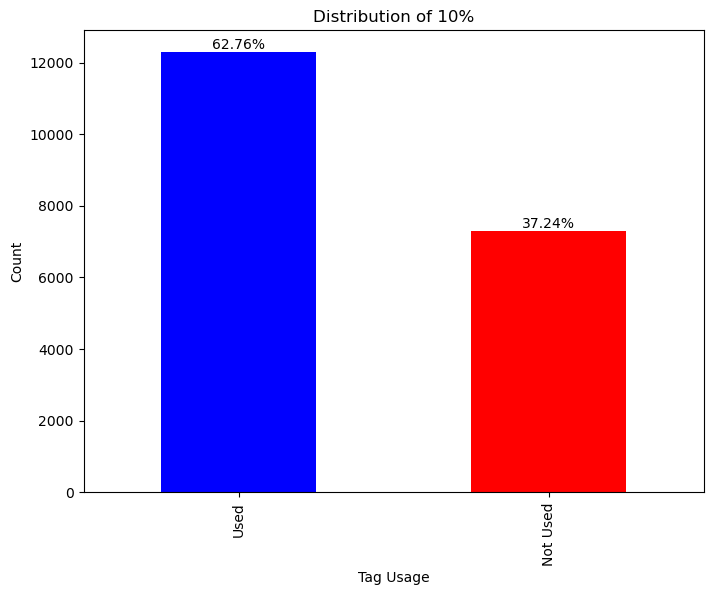

In [88]:
# Count the frequencies of each unique value in the 'TagUsage' column
tag_usage_counts = dfPpl['TagUsage'].value_counts()

# Calculate the percentage for each 'TagUsage' category
tag_usage_percentages = tag_usage_counts / tag_usage_counts.sum() * 100

# Define custom colors for each 'TagUsage'
custom_colors = ['blue', 'red']

# Create a bar chart with custom colors and annotations for percentages
plt.figure(figsize=(8, 6))
ax = tag_usage_counts.plot(kind='bar', color=custom_colors)
plt.title('Distribution of 10%')
plt.xlabel('Tag Usage')
plt.ylabel('Count')

# Annotate the bars with percentages
for i, v in enumerate(tag_usage_counts):
    ax.text(i, v, f'{tag_usage_percentages[i]:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()

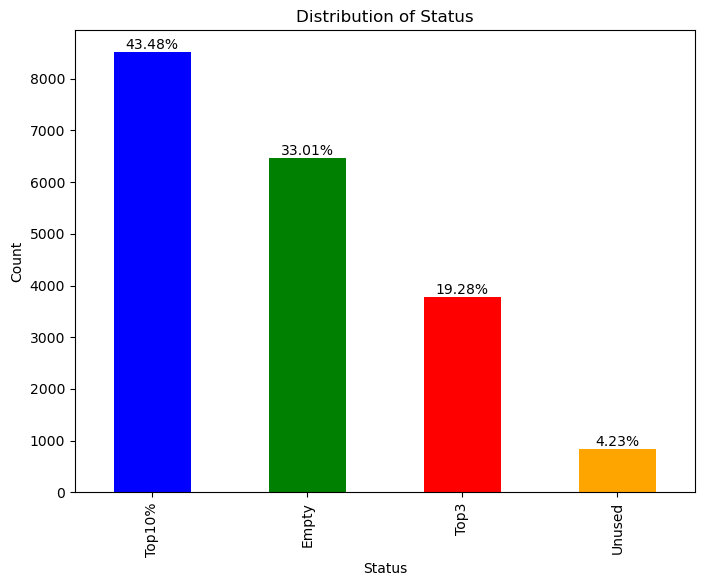

In [87]:
# Count the frequencies of each unique value in the 'Status' column
status_counts = dfPpl['Status'].value_counts()

# Calculate the percentage for each status category
status_percentages = status_counts / status_counts.sum() * 100

# Define custom colors for each status
custom_colors = ['blue', 'green', 'red', 'orange']

# Create a bar chart with custom colors and annotations for percentages
plt.figure(figsize=(8, 6))
ax = status_counts.plot(kind='bar', color=custom_colors)
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')

# Annotate the bars with percentages
for i, v in enumerate(status_counts):
    ax.text(i, v, f'{status_percentages[i]:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()

In [90]:
# Flatten the list of lists in the 'tags' column into a single list of tags
all_tags = [tag for tags in dfGame['tags'] for tag in tags if tag != '[none]']

# Count the frequency of each tag
tag_frequencies = Counter(all_tags)

# Create a DataFrame to store the tag names and their frequencies
tag_frequencies_df = pd.DataFrame(tag_frequencies.items(), columns=['Tag', 'Frequency'])

# Sort the DataFrame by frequency in descending order
tag_frequencies_df = tag_frequencies_df.sort_values(by='Frequency', ascending=False)

# Reset the index of the DataFrame
tag_frequencies_df = tag_frequencies_df.reset_index(drop=True)
tag_frequencies_df

,Tag,Frequency
0,minecraft,10247
1,gaming,3840
2,funny,3777
3,fortnite,3197
4,challenge,3177
...,...,...
43778,minecraft doors,1
43779,cursed redstone,1
43780,destiny 2 season of haunted,1
43781,destiny 2 season of haunted trailer reaction [...,1


In [91]:
# Calculate the total number of unique tags
total_unique_tags = len(tag_frequencies_df)

# Calculate the top 10% threshold
top_10_percent_threshold = int(total_unique_tags * 0.10)

# Filter the tags to get the top 10% most frequent tags
top_10_percent_tags = tag_frequencies_df.head(top_10_percent_threshold)

# Remove tags with a frequency of 1
top_10_percent_tags = top_10_percent_tags[top_10_percent_tags['Frequency'] != 1]

# Reset the index of the DataFrame
top_10_percent_tags = top_10_percent_tags.reset_index(drop=True)
top_10_percent_tags

,Tag,Frequency
0,minecraft,10247
1,gaming,3840
2,funny,3777
3,fortnite,3197
4,challenge,3177
...,...,...
4373,assassin's creed valhalla,24
4374,twitch ban,24
4375,minecraft build hacks,24
4376,elite skin,24


In [92]:
# Extract the tags from the 'Tag' column of the top_10_percent_tags DataFrame
top_10_percent_words = top_10_percent_tags['Tag'].tolist()

# Create a set of the top 10% most used words
top_10_percent_words_set = set(top_10_percent_words)

# Function to check if any word from the top 10% is present in the tags list
def contains_top_words(tags):
    for tag in tags:
        if tag in top_10_percent_words_set:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'tags' column of the dfSport DataFrame
dfGame['TagUsage'] = dfGame['tags'].apply(contains_top_words)

C:\Users\Sherow\AppData\Local\Temp\ipykernel_23576\1529508480.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGame['TagUsage'] = dfGame['tags'].apply(contains_top_words)


In [93]:
top_3_tags=['minecraft','gaming','funny']

# Function to check if any of the top 3 tags are present in the 'tags' list
def contains_top_tags(tags):
    for tag in tags:
        if tag in top_3_tags:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'tags' column of the dfSport DataFrame
dfGame['TopTagsUsage'] = dfGame['tags'].apply(contains_top_tags)

C:\Users\Sherow\AppData\Local\Temp\ipykernel_23576\4282128835.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGame['TopTagsUsage'] = dfGame['tags'].apply(contains_top_tags)


,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName,TagUsage,TopTagsUsage
1,"[apex, legends, stories, from, the, outlands, ...",2020-08-11T17:00:10Z,Apex Legends,2020-08-12T00:00:00Z,"[apex legends, apex legends characters, new ap...",2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare...",Gaming,Used,Not Used
12,"[rainbow, six, siege, operation, shadow, legac...",2020-08-11T17:13:53Z,Ubisoft North America,2020-08-12T00:00:00Z,"[r6, r6s, siege, new siege, new operators, new...",320872,14288,774,2085,False,False,“Prepare. Execute. Vanish”Sam Fisher joins Tea...,Gaming,Used,Not Used
71,"[fut, 21, official, trailer]",2020-08-10T15:00:08Z,EA SPORTS FIFA,2020-08-12T00:00:00Z,"[fifa, fifa 21, fifa21, fifa 21 trailer, fifa ...",1213314,64247,7181,5438,False,False,"Play with friends, customise your stadium, and...",Gaming,Used,Not Used
80,"[cash, nasty, made, a, mistake, challenging, m...",2020-08-10T17:57:08Z,Agent 00,2020-08-12T00:00:00Z,"[agent 00, cashnasty, 1v1 basketball]",480485,30207,391,2967,False,False,Came in there with one mission. Win the 1v1 vs...,Gaming,Used,Not Used
101,"[game, theory, minecraft,, stop, using, diamonds]",2020-08-08T18:05:14Z,The Game Theorists,2020-08-12T00:00:00Z,"[minecraft, minecraft theory, minecraft diamon...",2657891,154064,6509,21993,False,False,Thanks Honey for sponsoring! Get the best dea...,Gaming,Used,Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229568,"[we’re, married]",2023-09-26T15:56:04Z,Vikkstar123,2023-10-02T00:00:00Z,"[vikkstar, vikkstar123, vikkstar123hd, sidemen...",1275087,113749,0,3640,False,False,Circulr 🕶️ http://www.circulr.coBetter Off Alo...,Gaming,Used,Not Used
229573,"[we, made, the, minecraft, backrooms, hilarious]",2023-09-25T19:19:28Z,Slmccl,2023-10-02T00:00:00Z,"[slmccl, slimecicle, slimecicle twitch, tommyi...",476623,45341,0,1700,False,False,"Slimecicle, Ranboo, and TommyInnit get /tp'ed ...",Gaming,Used,Used
229575,"[neuvillette, full, guide, how, to, play,, bes...",2023-09-27T02:11:34Z,SevyPlays,2023-10-02T00:00:00Z,"[gaming, game streamer, guide, complete, full,...",237928,8705,0,577,False,False,Neuvillette is the 5-star Hydro DPS from Fonta...,Gaming,Used,Used
229582,"[using, 1, item, to, completely, break, this, ...",2023-09-24T15:00:01Z,Let's Game It Out,2023-10-02T00:00:00Z,"[let's game it out, lets game it out, let game...",2833356,115661,0,4217,False,False,🕹Stop torturing yourself and get Opera GX: htt...,Gaming,Used,Not Used


In [95]:
noTags=['[none]']

# Function to check if any of the top 3 tags are present in the 'tags' list
def contains_top_tags(tags):
    for tag in tags:
        if tag in noTags:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'tags' column of the dfSport DataFrame
dfGame['NoTags'] = dfGame['tags'].apply(contains_top_tags)

dfGame

C:\Users\Sherow\AppData\Local\Temp\ipykernel_23576\3173181253.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGame['NoTags'] = dfGame['tags'].apply(contains_top_tags)


,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName,TagUsage,TopTagsUsage,NoTags
1,"[apex, legends, stories, from, the, outlands, ...",2020-08-11T17:00:10Z,Apex Legends,2020-08-12T00:00:00Z,"[apex legends, apex legends characters, new ap...",2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare...",Gaming,Used,Not Used,Not Used
12,"[rainbow, six, siege, operation, shadow, legac...",2020-08-11T17:13:53Z,Ubisoft North America,2020-08-12T00:00:00Z,"[r6, r6s, siege, new siege, new operators, new...",320872,14288,774,2085,False,False,“Prepare. Execute. Vanish”Sam Fisher joins Tea...,Gaming,Used,Not Used,Not Used
71,"[fut, 21, official, trailer]",2020-08-10T15:00:08Z,EA SPORTS FIFA,2020-08-12T00:00:00Z,"[fifa, fifa 21, fifa21, fifa 21 trailer, fifa ...",1213314,64247,7181,5438,False,False,"Play with friends, customise your stadium, and...",Gaming,Used,Not Used,Not Used
80,"[cash, nasty, made, a, mistake, challenging, m...",2020-08-10T17:57:08Z,Agent 00,2020-08-12T00:00:00Z,"[agent 00, cashnasty, 1v1 basketball]",480485,30207,391,2967,False,False,Came in there with one mission. Win the 1v1 vs...,Gaming,Used,Not Used,Not Used
101,"[game, theory, minecraft,, stop, using, diamonds]",2020-08-08T18:05:14Z,The Game Theorists,2020-08-12T00:00:00Z,"[minecraft, minecraft theory, minecraft diamon...",2657891,154064,6509,21993,False,False,Thanks Honey for sponsoring! Get the best dea...,Gaming,Used,Used,Not Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229568,"[we’re, married]",2023-09-26T15:56:04Z,Vikkstar123,2023-10-02T00:00:00Z,"[vikkstar, vikkstar123, vikkstar123hd, sidemen...",1275087,113749,0,3640,False,False,Circulr 🕶️ http://www.circulr.coBetter Off Alo...,Gaming,Used,Not Used,Not Used
229573,"[we, made, the, minecraft, backrooms, hilarious]",2023-09-25T19:19:28Z,Slmccl,2023-10-02T00:00:00Z,"[slmccl, slimecicle, slimecicle twitch, tommyi...",476623,45341,0,1700,False,False,"Slimecicle, Ranboo, and TommyInnit get /tp'ed ...",Gaming,Used,Used,Not Used
229575,"[neuvillette, full, guide, how, to, play,, bes...",2023-09-27T02:11:34Z,SevyPlays,2023-10-02T00:00:00Z,"[gaming, game streamer, guide, complete, full,...",237928,8705,0,577,False,False,Neuvillette is the 5-star Hydro DPS from Fonta...,Gaming,Used,Used,Not Used
229582,"[using, 1, item, to, completely, break, this, ...",2023-09-24T15:00:01Z,Let's Game It Out,2023-10-02T00:00:00Z,"[let's game it out, lets game it out, let game...",2833356,115661,0,4217,False,False,🕹Stop torturing yourself and get Opera GX: htt...,Gaming,Used,Not Used,Not Used


In [97]:
# Function to determine the status based on 'tags', 'TagUsage', and 'TopTagsUsage'
def determine_status(row):
    if row['NoTags']== 'Used':
        return 'Empty'
    elif row['TagUsage'] == 'Used' and row['TopTagsUsage'] == 'Used':
        return 'Top3'
    elif row['TopTagsUsage'] == 'Used':
        return 'Top3'
    elif row['TagUsage'] == 'Used':
        return 'Top10%'
    else:
        return 'Unused'

# Apply the function to create the new column 'Status'
dfGame['Status'] = dfGame.apply(determine_status, axis=1)

dfGame

C:\Users\Sherow\AppData\Local\Temp\ipykernel_23576\406334033.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGame['Status'] = dfGame.apply(determine_status, axis=1)


,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName,TagUsage,TopTagsUsage,NoTags,Status
1,"[apex, legends, stories, from, the, outlands, ...",2020-08-11T17:00:10Z,Apex Legends,2020-08-12T00:00:00Z,"[apex legends, apex legends characters, new ap...",2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare...",Gaming,Used,Not Used,Not Used,Top10%
12,"[rainbow, six, siege, operation, shadow, legac...",2020-08-11T17:13:53Z,Ubisoft North America,2020-08-12T00:00:00Z,"[r6, r6s, siege, new siege, new operators, new...",320872,14288,774,2085,False,False,“Prepare. Execute. Vanish”Sam Fisher joins Tea...,Gaming,Used,Not Used,Not Used,Top10%
71,"[fut, 21, official, trailer]",2020-08-10T15:00:08Z,EA SPORTS FIFA,2020-08-12T00:00:00Z,"[fifa, fifa 21, fifa21, fifa 21 trailer, fifa ...",1213314,64247,7181,5438,False,False,"Play with friends, customise your stadium, and...",Gaming,Used,Not Used,Not Used,Top10%
80,"[cash, nasty, made, a, mistake, challenging, m...",2020-08-10T17:57:08Z,Agent 00,2020-08-12T00:00:00Z,"[agent 00, cashnasty, 1v1 basketball]",480485,30207,391,2967,False,False,Came in there with one mission. Win the 1v1 vs...,Gaming,Used,Not Used,Not Used,Top10%
101,"[game, theory, minecraft,, stop, using, diamonds]",2020-08-08T18:05:14Z,The Game Theorists,2020-08-12T00:00:00Z,"[minecraft, minecraft theory, minecraft diamon...",2657891,154064,6509,21993,False,False,Thanks Honey for sponsoring! Get the best dea...,Gaming,Used,Used,Not Used,Top3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229568,"[we’re, married]",2023-09-26T15:56:04Z,Vikkstar123,2023-10-02T00:00:00Z,"[vikkstar, vikkstar123, vikkstar123hd, sidemen...",1275087,113749,0,3640,False,False,Circulr 🕶️ http://www.circulr.coBetter Off Alo...,Gaming,Used,Not Used,Not Used,Top10%
229573,"[we, made, the, minecraft, backrooms, hilarious]",2023-09-25T19:19:28Z,Slmccl,2023-10-02T00:00:00Z,"[slmccl, slimecicle, slimecicle twitch, tommyi...",476623,45341,0,1700,False,False,"Slimecicle, Ranboo, and TommyInnit get /tp'ed ...",Gaming,Used,Used,Not Used,Top3
229575,"[neuvillette, full, guide, how, to, play,, bes...",2023-09-27T02:11:34Z,SevyPlays,2023-10-02T00:00:00Z,"[gaming, game streamer, guide, complete, full,...",237928,8705,0,577,False,False,Neuvillette is the 5-star Hydro DPS from Fonta...,Gaming,Used,Used,Not Used,Top3
229582,"[using, 1, item, to, completely, break, this, ...",2023-09-24T15:00:01Z,Let's Game It Out,2023-10-02T00:00:00Z,"[let's game it out, lets game it out, let game...",2833356,115661,0,4217,False,False,🕹Stop torturing yourself and get Opera GX: htt...,Gaming,Used,Not Used,Not Used,Top10%


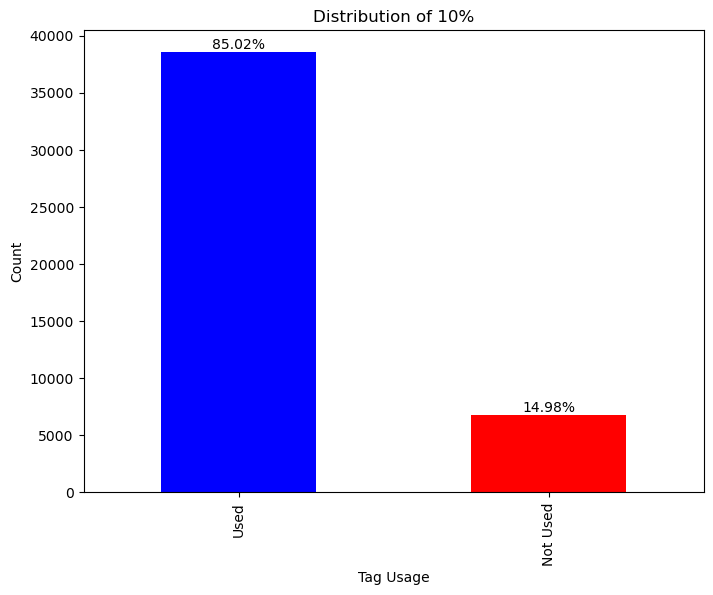

In [98]:
# Count the frequencies of each unique value in the 'TagUsage' column
tag_usage_counts = dfGame['TagUsage'].value_counts()

# Calculate the percentage for each 'TagUsage' category
tag_usage_percentages = tag_usage_counts / tag_usage_counts.sum() * 100

# Define custom colors for each 'TagUsage'
custom_colors = ['blue', 'red']

# Create a bar chart with custom colors and annotations for percentages
plt.figure(figsize=(8, 6))
ax = tag_usage_counts.plot(kind='bar', color=custom_colors)
plt.title('Distribution of 10%')
plt.xlabel('Tag Usage')
plt.ylabel('Count')

# Annotate the bars with percentages
for i, v in enumerate(tag_usage_counts):
    ax.text(i, v, f'{tag_usage_percentages[i]:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()

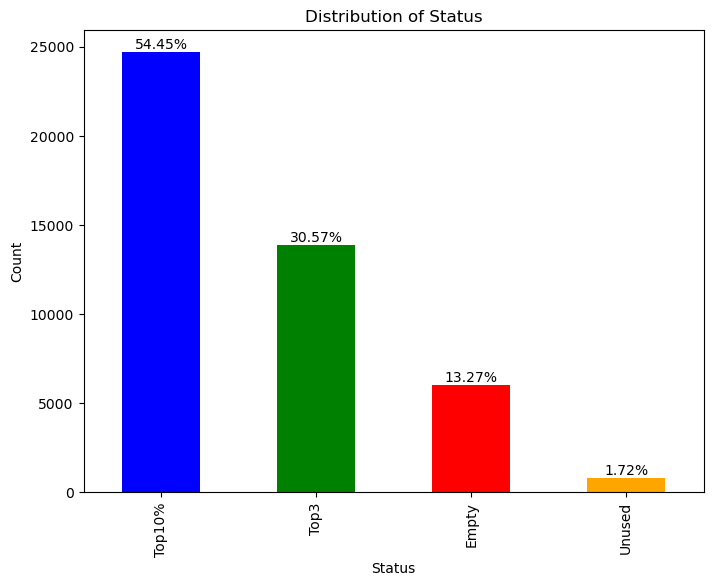

In [99]:
# Count the frequencies of each unique value in the 'Status' column
status_counts = dfGame['Status'].value_counts()

# Calculate the percentage for each status category
status_percentages = status_counts / status_counts.sum() * 100

# Define custom colors for each status
custom_colors = ['blue', 'green', 'red', 'orange']

# Create a bar chart with custom colors and annotations for percentages
plt.figure(figsize=(8, 6))
ax = status_counts.plot(kind='bar', color=custom_colors)
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')

# Annotate the bars with percentages
for i, v in enumerate(status_counts):
    ax.text(i, v, f'{status_percentages[i]:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()